In [14]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functions import *

In [15]:
###--- Import spatial data ---###

### Read in the data
df = pd.read_csv('data.csv')

### Generate the arrays needed from the dataframe
data = np.array(df["bicycle.theft"])
xi = np.array(df['xi'])
yi = np.array(df['yi'])
N = len(data)
coords = [(xi[i],yi[i]) for i in range(N)]

### Subsample the original data set
subsample_factor = 3
idx = subsample(N, subsample_factor, seed=42)
G = get_G(N,idx)
c = G @ data

In [16]:
###--- MCMC ---####

### Set MCMC parameters
n = 10000
beta = 0.2

### Set the likelihood and target, for sampling p(u|c)
log_target = log_poisson_target
log_likelihood = log_poisson_likelihood



In [17]:
def get_theta_estimate(l):
	K = GaussianKernel(coords, l)
	Kc = np.linalg.cholesky(K + 1e-6 * np.eye(N))
	u0 = Kc @ np.random.randn(N)
	pcn_samples, _ = pcn(log_poisson_likelihood, u0, c, K, G, n, beta)
	return np.mean(np.exp(pcn_samples), axis=0)

In [21]:
# determine best length parameter
num_lengths = 50
a = np.exp(9.21/num_lengths)
l = 0.01
lengths = np.zeros(num_lengths)
mean_errors = np.zeros(num_lengths)
for i in range(num_lengths):
	theta_est = get_theta_estimate(l)
	mean_errors[i] = np.mean(np.abs(theta_est-data))
	lengths[i] = l
	l *= a

100%|██████████| 10000/10000 [00:02<00:00, 4782.26it/s]


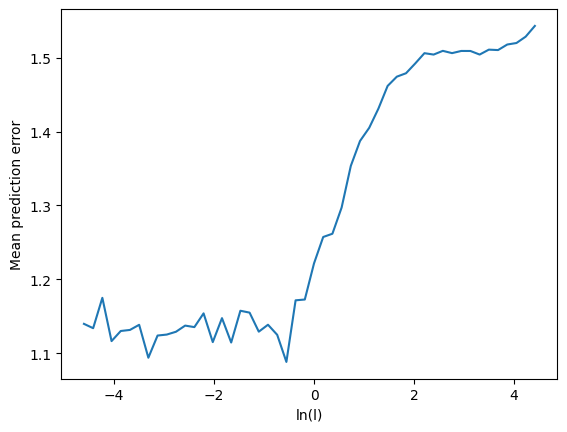

0.5753537637935474


In [24]:
fig, ax = plt.subplots()
ax.plot(np.log(lengths), mean_errors)
ax.set_xlabel("ln(l)")
ax.set_ylabel("Mean prediction error")
plt.show()
print(lengths[np.argmin(mean_errors)])

100%|██████████| 10000/10000 [00:02<00:00, 4927.03it/s]


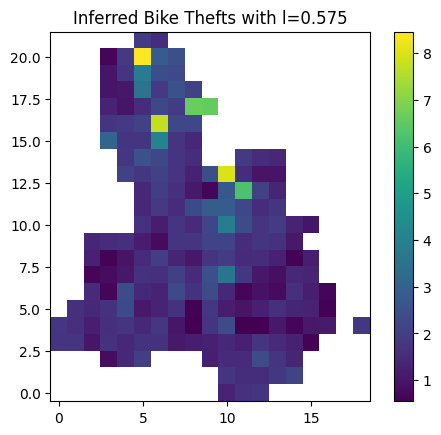

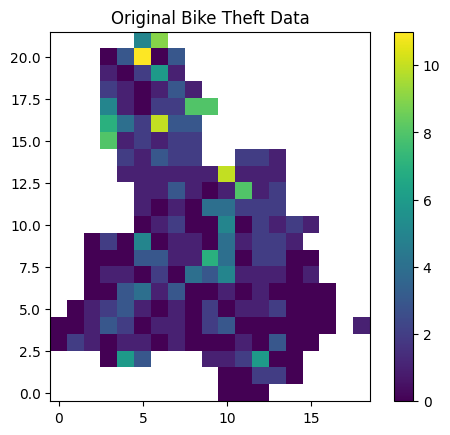

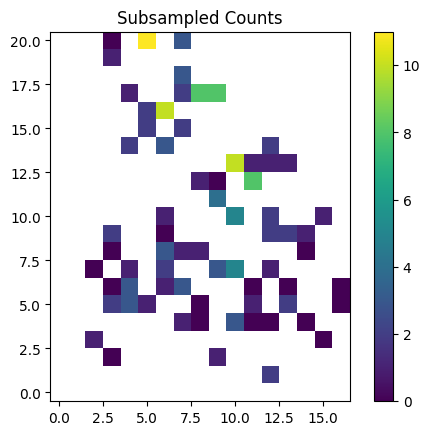

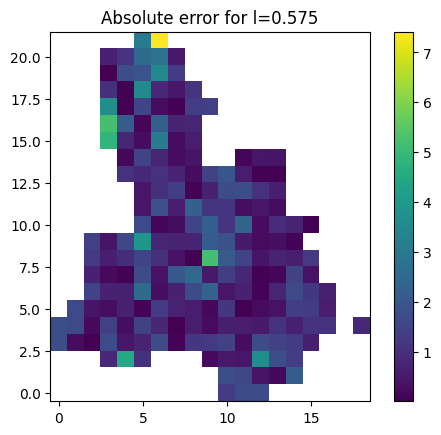

In [29]:
theta_est = get_theta_estimate(0.575)
plot_2D(theta_est, xi, yi, title="Inferred Bike Thefts with l=0.575")
plot_2D(data, xi, yi, title="Original Bike Theft Data")
plot_2D(c, xi[idx], yi[idx], title="Subsampled Counts")
plot_2D(np.abs(theta_est - data), xi, yi, title="Absolute error for l=0.575")

In [ ]:
lengths = [0.01, 2, 100]
for l in lengths:
	theta_est = get_theta_estimate(l)
	plot_2D(theta_est, xi, yi, title="Inferred Bike Thefts with l="+str(l))